<a href="https://colab.research.google.com/github/jacqueslethuaut/hackathon-shikansen/blob/main/SoloTraveller01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Shinkansen Travel Experience
The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train

Team:
- Raghavendar Lokineni
- Jacques Le Thuaut

## Initialisation

In [157]:
USING_GOOGLE_COLAB = True
HACKATHON_DATA = '/Hackathon'
TRAVEL_DATA_TRAIN = '/Traveldata_train_(1).csv'
TRAVEL_DATA_TEST = '/Traveldata_test_(1).csv'
SURVEY_DATA_TRAIN = '/Surveydata_train_(1).csv'
SURVEY_DATA_TEST = '/Surveydata_test_(1).csv'
DATA_DICTIONNARY = '/Data_Dictionary_(1).xlsx'

## Connecting to Google Drive

In [158]:
if USING_GOOGLE_COLAB:
  from google.colab import drive
  drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading librairies

In [204]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statistics

warnings.filterwarnings("ignore")

## Initialisation random function

In [160]:
def clear_backend():
  np.random.seed(42)
  random.seed(42)

## Loading the data


In [161]:
travel_data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks' + HACKATHON_DATA + TRAVEL_DATA_TRAIN)
travel_data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks' + HACKATHON_DATA + TRAVEL_DATA_TEST)
survey_data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks' + HACKATHON_DATA + SURVEY_DATA_TRAIN)
survey_data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks' + HACKATHON_DATA + SURVEY_DATA_TEST)

## Print shape of datasets

### travel data train

In [162]:
print(travel_data_train.head())
print(travel_data_train.tail())

         ID  Gender   Customer_Type   Age      Type_Travel Travel_Class  \
0  98800001  Female  Loyal Customer  52.0              NaN     Business   
1  98800002    Male  Loyal Customer  48.0  Personal Travel          Eco   
2  98800003  Female  Loyal Customer  43.0  Business Travel     Business   
3  98800004  Female  Loyal Customer  44.0  Business Travel     Business   
4  98800005  Female  Loyal Customer  50.0  Business Travel     Business   

   Travel_Distance  Departure_Delay_in_Mins  Arrival_Delay_in_Mins  
0              272                      0.0                    5.0  
1             2200                      9.0                    0.0  
2             1061                     77.0                  119.0  
3              780                     13.0                   18.0  
4             1981                      0.0                    0.0  
             ID Gender   Customer_Type   Age      Type_Travel Travel_Class  \
94374  98894375   Male  Loyal Customer  32.0  Business Tr

In [163]:
travel_data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0


In [164]:
travel_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


Verify that ID column contains non duplicated ID

In [165]:
travel_data_train.isnull().sum()

ID                            0
Gender                       77
Customer_Type              8951
Age                          33
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins      57
Arrival_Delay_in_Mins       357
dtype: int64

In [166]:
100.0 * travel_data_train.isnull().sum() / travel_data_train.shape[0]

ID                         0.000000
Gender                     0.081586
Customer_Type              9.484101
Age                        0.034965
Type_Travel                9.775480
Travel_Class               0.000000
Travel_Distance            0.000000
Departure_Delay_in_Mins    0.060395
Arrival_Delay_in_Mins      0.378262
dtype: float64

In [167]:
len(travel_data_train['ID'].unique())

94379

First observations :
- the train dataset contains 94379 events with unique ID (column 'ID')
- 8 other columns have been populated 
  - Gender with 77 missing values (~0.1%)
  - Customer_Type with 8951 missing values (~10%)
  - Age (range 7 - 85) with 33 missing values (~0.03%)
  - Type_Travel with 9226 missing values (~10%)
  - Travel_Class with no missing value
  - Travel_Distance (range 50 - 6951) with no missing value
  - Departure_Delay_in_Mins (range 0 - 1592) with 57 missing values (~0.06%)
  - Arrival_Delay_in_Mins (range 0 - 1584) with 357 missing values (~0.38%) => note : this is almost the same range as departure. Could be useful for missing values

Verify values of 'Gender', 'Customer_Type', 'Type_Travel\', 'Travel_Class'

In [168]:
print('values of Gender')
print(travel_data_train['Gender'].unique())
print('values of Customer_Type')
print(travel_data_train['Customer_Type'].unique())
print('values of Type_Travel')
print(travel_data_train['Type_Travel'].unique())
print('values of Travel_Class')
print(travel_data_train['Travel_Class'].unique())

values of Gender
['Female' 'Male' nan]
values of Customer_Type
['Loyal Customer' 'Disloyal Customer' nan]
values of Type_Travel
[nan 'Personal Travel' 'Business Travel']
values of Travel_Class
['Business' 'Eco']


Next observation :
- Once nan fixed, 'Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class' can be encoded




### survey data train

In [169]:
print(survey_data_train.head())
print(survey_data_train.tail())

         ID  Overall_Experience       Seat_Comfort Seat_Class  \
0  98800001                   0  Needs Improvement  Green Car   
1  98800002                   0               Poor   Ordinary   
2  98800003                   1  Needs Improvement  Green Car   
3  98800004                   0         Acceptable   Ordinary   
4  98800005                   1         Acceptable   Ordinary   

  Arrival_Time_Convenient           Catering  Platform_Location  \
0               Excellent          Excellent    Very Convenient   
1               Excellent               Poor  Needs Improvement   
2       Needs Improvement  Needs Improvement  Needs Improvement   
3       Needs Improvement                NaN  Needs Improvement   
4              Acceptable         Acceptable         Manageable   

  Onboard_Wifi_Service Onboard_Entertainment Online_Support  \
0                 Good     Needs Improvement     Acceptable   
1                 Good                  Poor           Good   
2    Needs Improv

In [170]:
survey_data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Overall_Experience,94379.0,5.466576e-01,0.497821,0.0,0.0,1.0,1.0,1.0


In [171]:
survey_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [172]:
travel_data_train['ID'].equals(survey_data_train['ID'])

True

All events in survey_data_train and travel_data_train share the same IDs


Verify values of 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding'

In [173]:
print('values of Overall_Experience')
print(survey_data_train['Overall_Experience'].unique())
print('values of Seat_Comfort')
print(survey_data_train['Seat_Comfort'].unique())
print('values of Seat_Class')
print(survey_data_train['Seat_Class'].unique())
print('values of Arrival_Time_Convenient')
print(survey_data_train['Arrival_Time_Convenient'].unique())
print('values of Catering')
print(survey_data_train['Catering'].unique())
print('values of Platform_Location')
print(survey_data_train['Platform_Location'].unique())
print('values of Onboard_Wifi_Service')
print(survey_data_train['Onboard_Wifi_Service'].unique())
print('values of Legroom')
print(survey_data_train['Legroom'].unique())
print('values of Baggage_Handling')
print(survey_data_train['Baggage_Handling'].unique())
print('values of CheckIn_Service')
print(survey_data_train['CheckIn_Service'].unique())
print('values of Cleanliness')
print(survey_data_train['Cleanliness'].unique())
print('values of Online_Boarding')
print(survey_data_train['Online_Boarding'].unique())



values of Overall_Experience
[0 1]
values of Seat_Comfort
['Needs Improvement' 'Poor' 'Acceptable' 'Good' 'Excellent'
 'Extremely Poor' nan]
values of Seat_Class
['Green Car' 'Ordinary']
values of Arrival_Time_Convenient
['Excellent' 'Needs Improvement' 'Acceptable' nan 'Good' 'Poor'
 'Extremely Poor']
values of Catering
['Excellent' 'Poor' 'Needs Improvement' nan 'Acceptable' 'Good'
 'Extremely Poor']
values of Platform_Location
['Very Convenient' 'Needs Improvement' 'Manageable' 'Inconvenient'
 'Convenient' nan 'Very Inconvenient']
values of Onboard_Wifi_Service
['Good' 'Needs Improvement' 'Acceptable' 'Excellent' 'Poor'
 'Extremely Poor' nan]
values of Legroom
['Acceptable' 'Needs Improvement' 'Excellent' 'Good' 'Poor'
 'Extremely Poor' nan]
values of Baggage_Handling
['Needs Improvement' 'Poor' 'Excellent' 'Acceptable' 'Good' nan]
values of CheckIn_Service
['Good' 'Needs Improvement' 'Acceptable' 'Excellent' 'Poor' nan
 'Extremely Poor']
values of Cleanliness
['Needs Improvement' '

The values of 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding' can be encoded (once nan values fixed)


### train parts : merge survey dataset and travel dataset

In [174]:
train_dataset = pd.merge(travel_data_train, survey_data_train, on='ID')

### Descriptive statistics on train dataset (merged one)

In [175]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

The first feature is useless so we can drop it

In [176]:
train_dataset = train_dataset.drop(train_dataset.iloc[:,[0]], axis = 1)
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   94302 non-null  object 
 1   Customer_Type            85428 non-null  object 
 2   Age                      94346 non-null  float64
 3   Type_Travel              85153 non-null  object 
 4   Travel_Class             94379 non-null  object 
 5   Travel_Distance          94379 non-null  int64  
 6   Departure_Delay_in_Mins  94322 non-null  float64
 7   Arrival_Delay_in_Mins    94022 non-null  float64
 8   Overall_Experience       94379 non-null  int64  
 9   Seat_Comfort             94318 non-null  object 
 10  Seat_Class               94379 non-null  object 
 11  Arrival_Time_Convenient  85449 non-null  object 
 12  Catering                 85638 non-null  object 
 13  Platform_Location        94349 non-null  object 
 14  Onboard_Wifi_Service  

Prepare categorical indices

In [177]:
categorical_indices = [0, 1, 3, 4] + list(range(9, 24))
train_dataset.iloc[:,categorical_indices] = train_dataset.iloc[:,categorical_indices].astype('category')
train_dataset.describe(include=['category']).T

,count,unique,top,freq
Gender,94302,2,Female,47815
Customer_Type,85428,2,Loyal Customer,69823
Type_Travel,85153,2,Business Travel,58617
Travel_Class,94379,2,Eco,49342
Seat_Comfort,94318,6,Acceptable,21158
Seat_Class,94379,2,Green Car,47435
Arrival_Time_Convenient,85449,6,Good,19574
Catering,85638,6,Acceptable,18468
Platform_Location,94349,6,Manageable,24173
Onboard_Wifi_Service,94349,6,Good,22835


'Overall_Experience' is the target variable. Let's look the ratio of the target variable

In [178]:
satisfaction_dataset = train_dataset['Overall_Experience']
train_dataset = train_dataset.drop(['Overall_Experience'], axis = 1)
train_dataset.describe(include=['category']).T

,count,unique,top,freq
Gender,94302,2,Female,47815
Customer_Type,85428,2,Loyal Customer,69823
Type_Travel,85153,2,Business Travel,58617
Travel_Class,94379,2,Eco,49342
Seat_Comfort,94318,6,Acceptable,21158
Seat_Class,94379,2,Green Car,47435
Arrival_Time_Convenient,85449,6,Good,19574
Catering,85638,6,Acceptable,18468
Platform_Location,94349,6,Manageable,24173
Onboard_Wifi_Service,94349,6,Good,22835


In [179]:
satisfaction_dataset.value_counts()

1    51593
0    42786
Name: Overall_Experience, dtype: int64

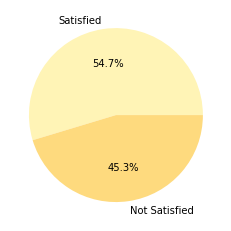

In [180]:
plt.pie(satisfaction_dataset.value_counts(), 
        labels = ["Satisfied", "Not Satisfied"], 
        colors = sns.color_palette("YlOrBr"), 
        autopct = '%1.1f%%')
pass

The target is more or less well-balanced

Matrix of correlation of quantitative features

In [181]:
train_corr_mat = train_dataset.corr()
train_corr_mat

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
Age,1.000000,-0.251570,-0.007973,-0.010610
Travel_Distance,-0.251570,1.000000,0.114174,0.111317
Departure_Delay_in_Mins,-0.007973,0.114174,1.000000,0.965483
Arrival_Delay_in_Mins,-0.010610,0.111317,0.965483,1.000000


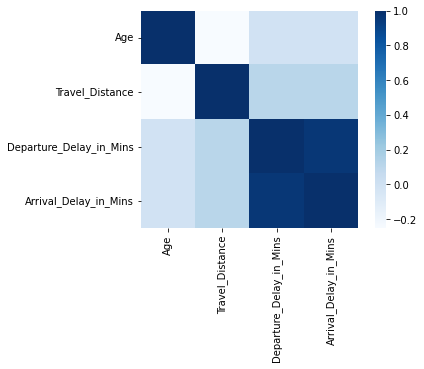

In [182]:
sns.heatmap(train_corr_mat, square = True, cmap = 'Blues')
pass

Observations :
- as expected, there is a strong correlation between Departure_Delay_in_Mins and Arrival_Delay_in_Mins

In [183]:
train_corr_mat.where(np.triu(train_corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

Departure_Delay_in_Mins  Arrival_Delay_in_Mins    0.965483
dtype: float64

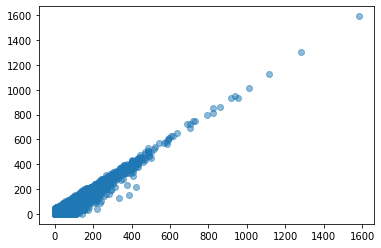

In [184]:
plt.scatter(train_dataset['Arrival_Delay_in_Mins'], train_dataset['Departure_Delay_in_Mins'], alpha = 0.5)
pass

It is clear that the dependance between arrival delay time and Departure delay time is linear.

Obvisouly, if the train leaves with a delay, its arrival as almost the same delay (or in a linear way). The train does not accelarate to compensate its late.

After this analysis, we are ready to correct missing values of the column 'Arrival_delay_in_Mins'

In [185]:
train_dataset['Arrival_Delay_in_Mins'] = train_dataset['Arrival_Delay_in_Mins'].fillna(train_dataset['Departure_Delay_in_Mins'])
train_dataset['Departure_Delay_in_Mins'] = train_dataset['Departure_Delay_in_Mins'].fillna(train_dataset['Departure_Delay_in_Mins'].median(axis=0))
train_dataset['Arrival_Delay_in_Mins'] = train_dataset['Arrival_Delay_in_Mins'].fillna(train_dataset['Arrival_Delay_in_Mins'].median(axis=0))

train_dataset[['Arrival_Delay_in_Mins', 'Departure_Delay_in_Mins']].isnull().sum()

Arrival_Delay_in_Mins      0
Departure_Delay_in_Mins    0
dtype: int64

Let's plot again the correlation of those 2 features

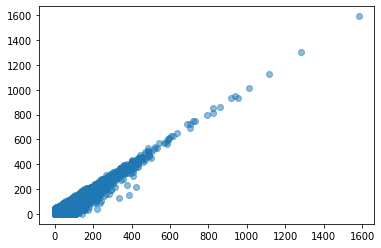

In [186]:
plt.scatter(train_dataset['Arrival_Delay_in_Mins'], train_dataset['Departure_Delay_in_Mins'], alpha = 0.5)
pass

Let's fix missing value for Age

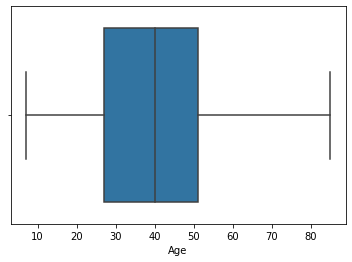

In [187]:
sns.boxplot(train_dataset.Age)
pass

Let's fill Age with mean as the data is not skewed, 


In [188]:
train_dataset.Age.fillna(value = train_dataset.Age.mean(), inplace=True)
train_dataset.Age.isnull().sum()


0

Let's see now the ratio of values for each categorical feature

In [189]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   94302 non-null  category
 1   Customer_Type            85428 non-null  category
 2   Age                      94379 non-null  float64 
 3   Type_Travel              85153 non-null  category
 4   Travel_Class             94379 non-null  category
 5   Travel_Distance          94379 non-null  int64   
 6   Departure_Delay_in_Mins  94379 non-null  float64 
 7   Arrival_Delay_in_Mins    94379 non-null  float64 
 8   Seat_Comfort             94318 non-null  category
 9   Seat_Class               94379 non-null  category
 10  Arrival_Time_Convenient  85449 non-null  category
 11  Catering                 85638 non-null  category
 12  Platform_Location        94349 non-null  category
 13  Onboard_Wifi_Service     94349 non-null  category
 14  Onboar

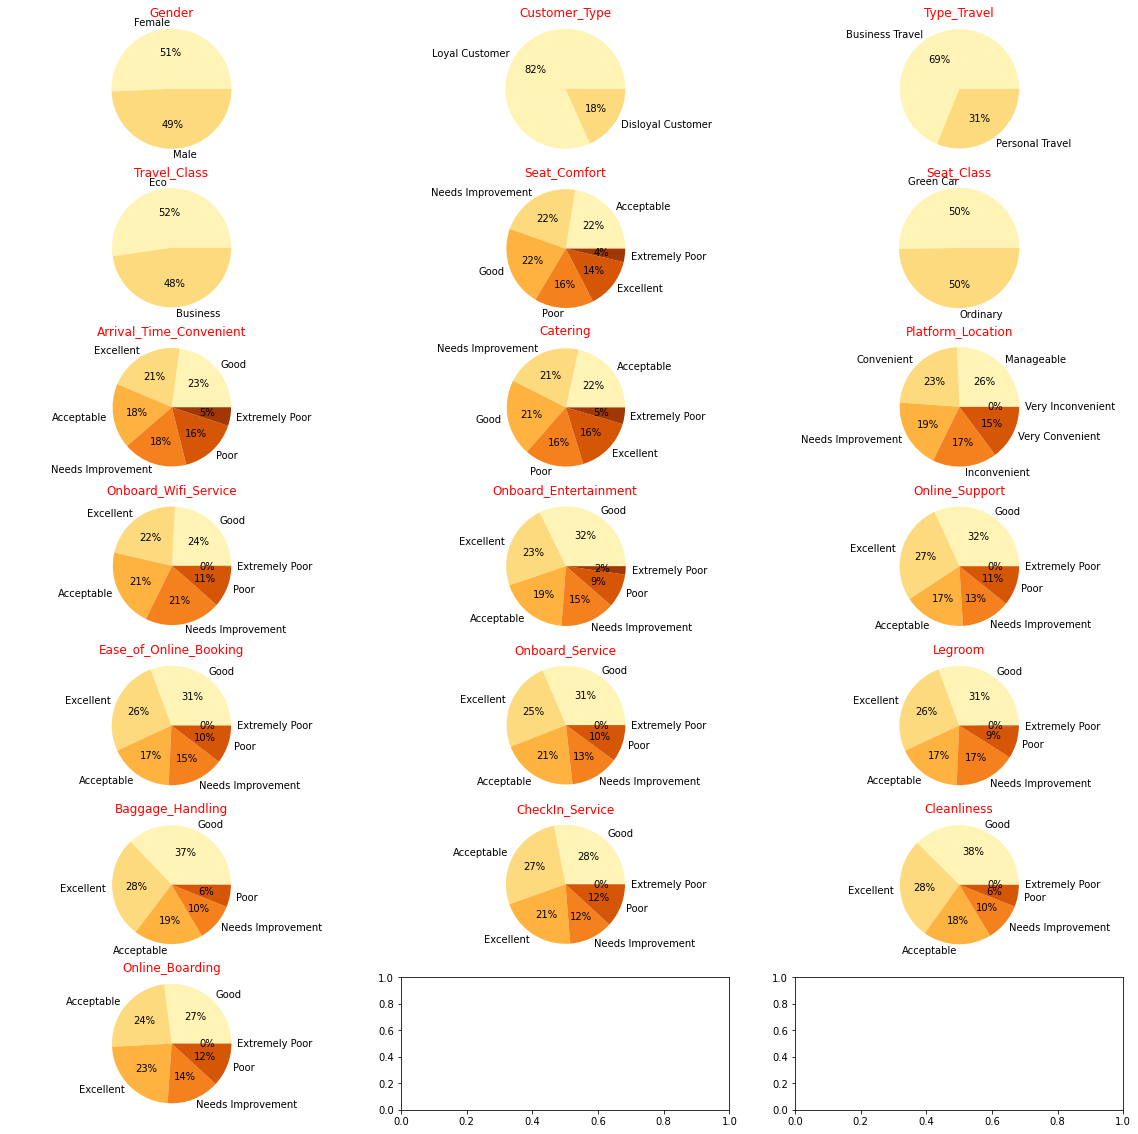

In [190]:
categorical_indices = [0, 1, 3, 4] + list(range(8, 23))
cat = train_dataset.iloc[:,categorical_indices]
fig, axes = plt.subplots(7, 3, figsize = (20, 20))
for i, col in enumerate(cat):
    column_values = train_dataset[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, 
                        labels = labels, 
                        colors = sns.color_palette("YlOrBr"), 
                        autopct = '%1.0f%%')
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col, color='r')
plt.show()
pass

Now we are ready to fix missing values for all features

In [191]:
# init seeds
clear_backend()

Gender is uniformely distributed so we can easily fixed the missing values

In [201]:
values = ['Female', 'Male']
train_dataset['Gender'] = train_dataset['Gender'].apply(lambda l: l if isinstance(l, pd.api.types.CategoricalDtype) else np.random.choice(values))

train_dataset['Gender'].isnull().sum()

0

Customer_Type has a 'Loyal Customer'/'Disloyal Customer' ratio near 80/20 so we can fix the missing values

In [199]:
values = ['Loyal Customer', 'Loyal Customer', 
          'Loyal Customer', 'Loyal Customer', 
          'Loyal Customer', 'Loyal Customer', 
          'Loyal Customer', 'Loyal Customer', 
          'Disloyal Customer', 'Disloyal Customer']
train_dataset['Customer_Type'] = train_dataset['Customer_Type'].apply(lambda l: l if isinstance(l, pd.api.types.CategoricalDtype) else np.random.choice(values))

train_dataset['Customer_Type'].isnull().sum()

0

Type_Travel has a 'Business travel'/'Personal Travel' ratio near 70/30 so again we can fix the missing values


In [198]:
values = ['Business Travel', 'Business Travel', 
          'Business Travel', 'Business Travel', 
          'Business Travel', 'Business Travel', 
          'Business Travel', 'Personal Travel', 
          'Personal Travel', 'Personal Travel']
train_dataset['Type_Travel'] = train_dataset['Type_Travel'].apply(lambda l: l if isinstance(l, pd.api.types.CategoricalDtype) else np.random.choice(values))

train_dataset['Type_Travel'].isnull().sum()

0

For 
- Seat_Comfort             
- Arrival_Time_Convenient  
- Catering                 
- Platform_Location        
- Onboard_Wifi_Service     
- Onboard_Entertainment    
- Online_Support           
- Ease_of_Online_Booking   
- Onboard_Service          
- Legroom                  
- Baggage_Handling         
- CheckIn_Service          
- Cleanliness              
- Online_Boarding

and according to their distributions, we can try to fulfil missing values with their mode

In [195]:
train_dataset.isnull().sum()

Gender                       77
Customer_Type              8951
Age                           0
Type_Travel                9226
Travel_Class                  0
Travel_Distance               0
Departure_Delay_in_Mins       0
Arrival_Delay_in_Mins         0
Seat_Comfort                 61
Seat_Class                    0
Arrival_Time_Convenient    8930
Catering                   8741
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Online_Support               91
Ease_of_Online_Booking       73
Onboard_Service            7601
Legroom                      90
Baggage_Handling            142
CheckIn_Service              77
Cleanliness                   6
Online_Boarding               6
dtype: int64

In [205]:
train_dataset['Seat_Comfort'].fillna(statistics.mode(train_dataset['Seat_Comfort']), inplace=True)
train_dataset['Arrival_Time_Convenient'].fillna(statistics.mode(train_dataset['Arrival_Time_Convenient']), inplace=True)
train_dataset['Catering'].fillna(statistics.mode(train_dataset['Catering']), inplace=True)
train_dataset['Platform_Location'].fillna(statistics.mode(train_dataset['Platform_Location']), inplace=True)
train_dataset['Onboard_Wifi_Service'].fillna(statistics.mode(train_dataset['Onboard_Wifi_Service']), inplace=True)
train_dataset['Onboard_Entertainment'].fillna(statistics.mode(train_dataset['Onboard_Entertainment']), inplace=True)
train_dataset['Online_Support'].fillna(statistics.mode(train_dataset['Online_Support']), inplace=True)
train_dataset['Ease_of_Online_Booking'].fillna(statistics.mode(train_dataset['Ease_of_Online_Booking']), inplace=True)
train_dataset['Onboard_Service'].fillna(statistics.mode(train_dataset['Onboard_Service']), inplace=True)
train_dataset['Legroom'].fillna(statistics.mode(train_dataset['Legroom']), inplace=True)
train_dataset['Baggage_Handling'].fillna(statistics.mode(train_dataset['Baggage_Handling']), inplace=True)
train_dataset['CheckIn_Service'].fillna(statistics.mode(train_dataset['CheckIn_Service']), inplace=True)
train_dataset['Cleanliness'].fillna(statistics.mode(train_dataset['Cleanliness']), inplace=True)
train_dataset['Online_Boarding'].fillna(statistics.mode(train_dataset['Online_Boarding']), inplace=True)


In [206]:
train_dataset.isnull().sum()

Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

All missing data have been fixed now

## Encode categorical data

In [207]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   94379 non-null  object  
 1   Customer_Type            94379 non-null  object  
 2   Age                      94379 non-null  float64 
 3   Type_Travel              94379 non-null  object  
 4   Travel_Class             94379 non-null  category
 5   Travel_Distance          94379 non-null  int64   
 6   Departure_Delay_in_Mins  94379 non-null  float64 
 7   Arrival_Delay_in_Mins    94379 non-null  float64 
 8   Seat_Comfort             94379 non-null  category
 9   Seat_Class               94379 non-null  category
 10  Arrival_Time_Convenient  94379 non-null  category
 11  Catering                 94379 non-null  category
 12  Platform_Location        94379 non-null  category
 13  Onboard_Wifi_Service     94379 non-null  category
 14  Onboar

Fix category for Gender, Customer_Type and Type_travel

In [217]:
train_dataset['Gender'] = train_dataset.Gender.astype('category')
train_dataset['Customer_Type'] = train_dataset.Gender.astype('category')
train_dataset['Type_Travel'] = train_dataset.Gender.astype('category')

train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   94379 non-null  category
 1   Customer_Type            94379 non-null  category
 2   Age                      94379 non-null  float64 
 3   Type_Travel              94379 non-null  category
 4   Travel_Class             94379 non-null  category
 5   Travel_Distance          94379 non-null  int64   
 6   Departure_Delay_in_Mins  94379 non-null  float64 
 7   Arrival_Delay_in_Mins    94379 non-null  float64 
 8   Seat_Comfort             94379 non-null  category
 9   Seat_Class               94379 non-null  category
 10  Arrival_Time_Convenient  94379 non-null  category
 11  Catering                 94379 non-null  category
 12  Platform_Location        94379 non-null  category
 13  Onboard_Wifi_Service     94379 non-null  category
 14  Onboar

First the numerical columns

In [218]:
numerical_columns = [c for c in train_dataset.columns if train_dataset[c].dtype.name != 'category']
categorical_columns = [c for c in train_dataset.columns if train_dataset[c].dtype.name == 'category']
train_data_describe = train_dataset.describe(include = ['category'])

Split between binary and non-binary columns

In [219]:
binary_columns = [c for c in categorical_columns if train_data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if train_data_describe[c]['unique'] > 2]
print(binary_columns)
print(nonbinary_columns)

['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Class']
['Seat_Comfort', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']
